In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
mall = pd.read_csv(r"C:\Users\HP\Favorites\Downloads\Mall_Customers.csv")
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
# Select relevant features
x = mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [28]:
sc = StandardScaler()
X = sc.fit_transform(x)

In [30]:
# Optional PCA for 2D view
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [34]:
# Elbow Method to find optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:14

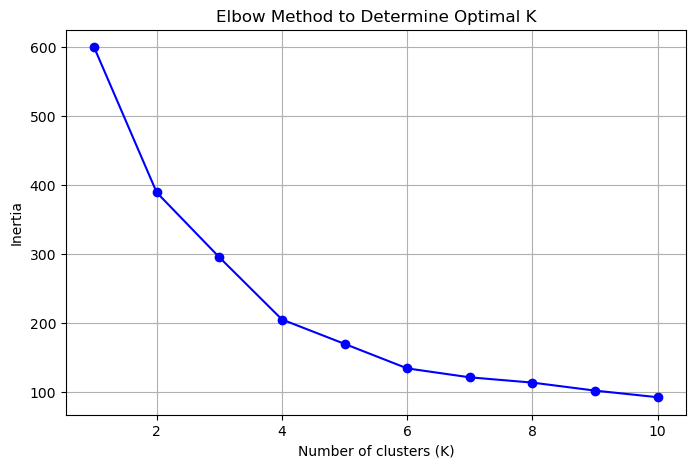

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.grid(True)
plt.show()

In [38]:
# Step 4: Fit KMeans and assign cluster labels
optimal_k = 5  # Based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
# Add labels to dataframe
mall['Cluster'] = cluster_labels

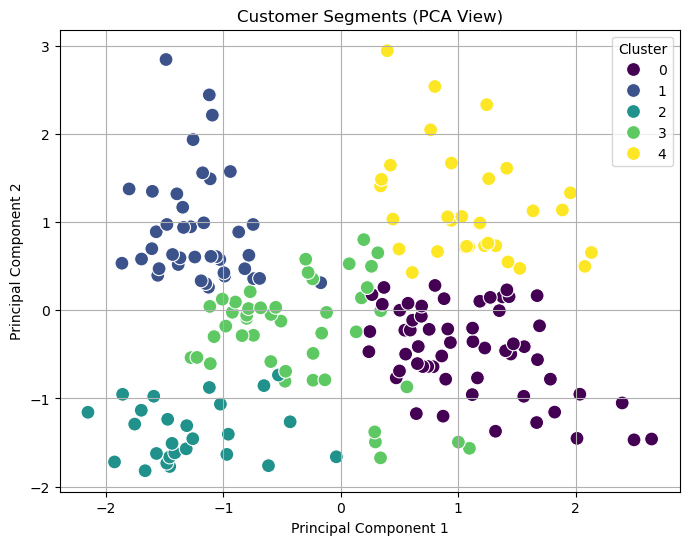

In [46]:
# Step 5: Visualize clusters with color-coding (2D view)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.title('Customer Segments (PCA View)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [50]:
#Evaluate clustering using Silhouette Score
sil_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score for K={optimal_k}: {sil_score:.3f}")

Silhouette Score for K=5: 0.408
